In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import cv2
import torchvision
import torchvision.transforms as transforms
import time
from PIL import Image

In [51]:
def rgb_to_luma(image):
    R = image[:, :, 0]
    G = image[:, :, 1]
    B = image[:, :, 2]
    Y = 0.299 * R + 0.587 * G + 0.114 * B
    return Y

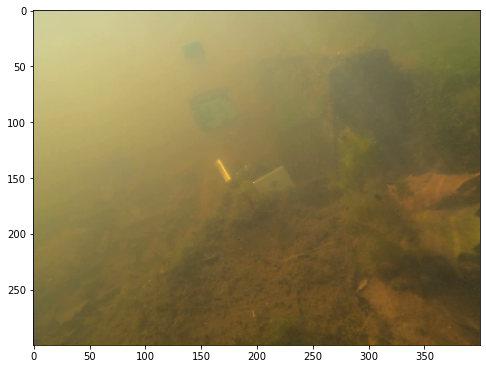

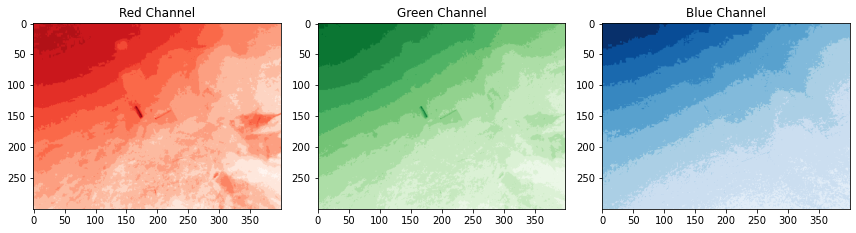

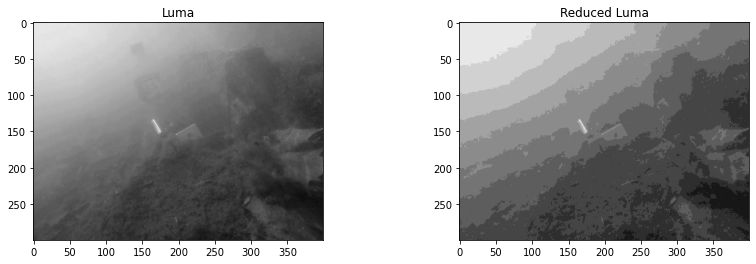

In [112]:
img = np.asarray(Image.open('Desktop/bottleFrames/frame_0001.png'))

scale_w = img.shape[1] // 400
scale_h = img.shape[0] // 300
scaled = np.zeros((300, 400, img.shape[2]), dtype=img.dtype)
for i in range(300):
    for j in range(400):
        x = j * scale_w
        y = i * scale_h
        scaled[i, j] = img[y, x]
'''
height, width = scaled.shape[:2]
intra4res = np.zeros((height, width, scaled.shape[2]), dtype=scaled.dtype)
for i in range(0, height, 4):
    for j in range(0, width, 4):
        intra4res[i:i+4, j:j+4] = scaled[i, j]
'''
        
fig = plt.figure(figsize=(8, 8))
plt.imshow(scaled)
plt.show()

red_channel = scaled[:, :, 0] >> 4
green_channel = scaled[:, :, 1] >> 4
blue_channel = scaled[:, :, 2] >> 4

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(red_channel, cmap='Reds')
axs[0].set_title('Red Channel')
axs[1].imshow(green_channel, cmap='Greens')
axs[1].set_title('Green Channel')
axs[2].imshow(blue_channel, cmap='Blues')
axs[2].set_title('Blue Channel')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
Y = rgb_to_luma(scaled).astype(np.uint8)
axs[0].imshow(Y, cmap='gray')
axs[0].set_title('Luma')
axs[1].imshow(Y >> 4, cmap='gray')
axs[1].set_title('Reduced Luma')
plt.show()

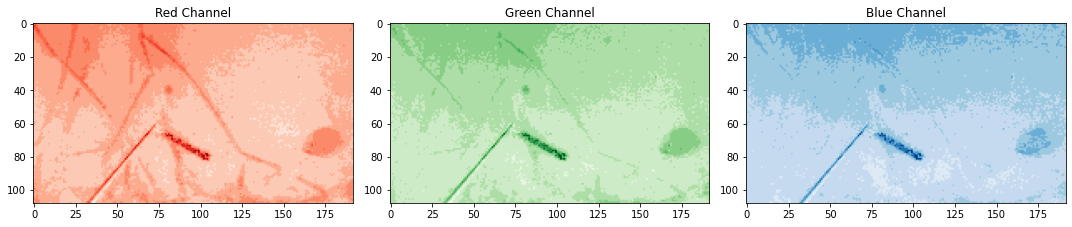

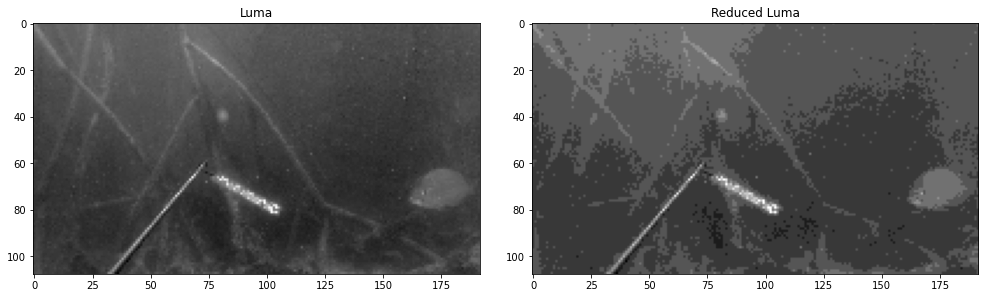

In [105]:
img = np.asarray(Image.open('Desktop/fish.png'))

scale_w = img.shape[1] // 192
scale_h = img.shape[0] // 108
scaled = np.zeros((108, 192, img.shape[2]), dtype=img.dtype)
for i in range(108):
    for j in range(192):
        x = j * scale_w
        y = i * scale_h
        scaled[i, j] = img[y, x]
        
red_channel = scaled[:, :, 0] >> 4
green_channel = scaled[:, :, 1] >> 4
blue_channel = scaled[:, :, 2] >> 4

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].imshow(red_channel, cmap='Reds')
axs[0].set_title('Red Channel')
axs[1].imshow(green_channel, cmap='Greens')
axs[1].set_title('Green Channel')
axs[2].imshow(blue_channel, cmap='Blues')
axs[2].set_title('Blue Channel')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
Y = rgb_to_luma(scaled).astype(np.uint8)
axs[0].imshow(Y, cmap='gray')
axs[0].set_title('Luma')
axs[1].imshow(Y >> 4, cmap='gray')
axs[1].set_title('Reduced Luma')
plt.tight_layout()
plt.show()

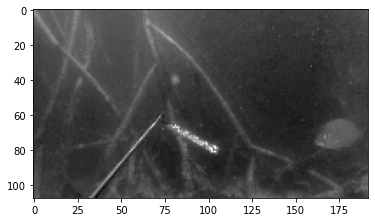

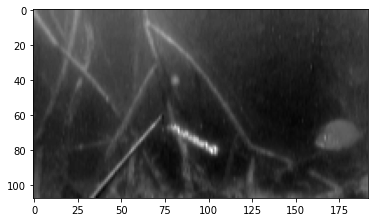

In [96]:
def lowpass_filter(image, kernel_size, sigma):
    kernel = cv2.getGaussianKernel(kernel_size, sigma)
    filtered = cv2.filter2D(image, -1, kernel)
    return filtered

filtered_image = lowpass_filter(scaled[:, :, 0], kernel_size=45000, sigma=1.0)
plt.imshow(scaled[:, :, 0], cmap='gray')
plt.show()
plt.imshow(filtered_image, cmap='gray')
plt.show()

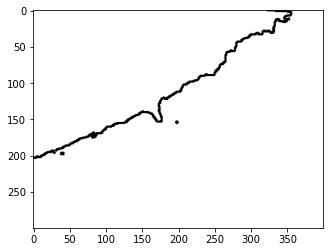

In [111]:
def detect_gradient_pattern_specifics(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    edges = cv2.Canny(thresholded, 30, 100)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    output_image = np.ones_like(image) * 255
    cv2.drawContours(output_image, contours, -1, (0, 0, 0), 2)
    return output_image

output_image = detect_gradient_pattern_specifics(scaled[:, :, :3])
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.show()

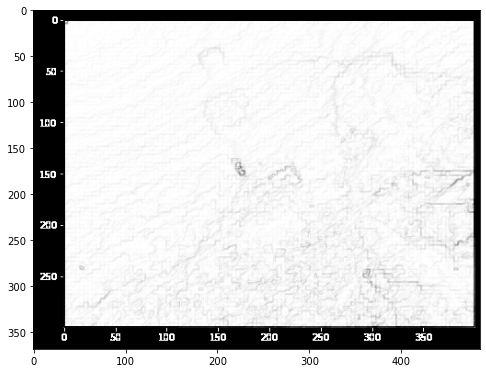

In [41]:
img = np.asarray(Image.open('Desktop/sbBottle.png')).astype(np.uint8)
img = np.dot(img[...,:3], [0.2126, 0.7152, 0.0722]).astype(np.uint8)

fig = plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='gray')
plt.show()

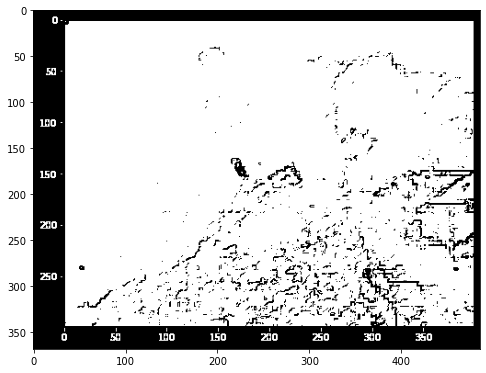

In [42]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j] < 232:
            img[i][j] = 0
        else:
            img[i][j] = 255
            
fig = plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='gray')
plt.show()

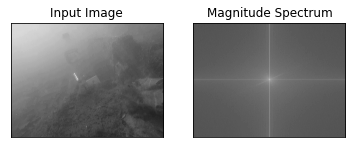

In [46]:
image = cv2.imread('Desktop/bottleFrames/frame_0001.png', cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(image)
f_shift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(f_shift))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [98]:
Y >> 4

array([[10,  9,  9, ...,  8,  8,  8],
       [10, 10,  9, ...,  8,  8,  9],
       [10, 10,  9, ...,  8,  8,  8],
       ...,
       [ 8,  8,  8, ...,  7,  8,  8],
       [ 8,  8,  8, ...,  7,  7,  8],
       [ 8,  8,  8, ...,  7,  7,  8]], dtype=uint8)

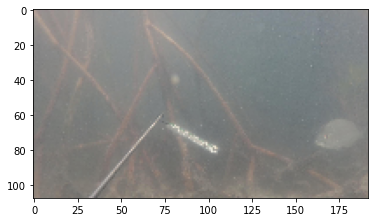

In [100]:
plt.imshow(scaled[:, :, :3], cmap='gray')
plt.show()